In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt

In [3]:
data = pd.read_csv("diabetees.csv", header=None,names=["Pregnancies","Glucose", "BloodPressure " ,"SkinThickness", "Insulin"  , "BMI" , "DiabetesPedigreeFunction" ,"Age", "result"])
print(data.head(10))
print("============================")
print(data.describe())


   Pregnancies  Glucose  BloodPressure   SkinThickness  Insulin   BMI  \
0            6      148              72             35        0  33.6   
1            1       85              66             29        0  26.6   
2            8      183              64              0        0  23.3   
3            1       89              66             23       94  28.1   
4            0      137              40             35      168  43.1   
5            5      116              74              0        0  25.6   
6            3       78              50             32       88  31.0   
7           10      115               0              0        0  35.3   
8            2      197              70             45      543  30.5   
9            8      125              96              0        0   0.0   

   DiabetesPedigreeFunction  Age  result  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.

In [4]:
positive = data[data["result"].isin([1])]
negative = data[data["result"].isin([0])]

Text(0, 0.5, 'Exam2 Score')

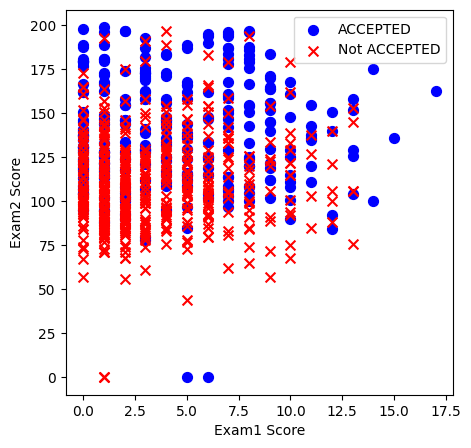

In [5]:
fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(positive["Pregnancies"],positive["Glucose"], s=50 , c="b" , marker="o",label="ACCEPTED")
ax.scatter(negative["Pregnancies"],negative["Glucose"], s=50, c="r" , marker="x" , label="Not ACCEPTED")
ax.legend()
ax.set_xlabel("Exam1 Score")
ax.set_ylabel("Exam2 Score")

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))



In [7]:
data.insert(0,"ones" , 1)
col = data.shape[1]
x_axis = data.iloc[: , 0:col-1]
y_axis = data.iloc[: , col-1 :col]
x_axis = np.array(x_axis.values)
y_axis = np.array(y_axis.values)
theta = np.zeros(data.shape[1]-1)

In [8]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad


In [9]:

result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x_axis, y_axis))  #get min values of function cost using another function gradiant 
print (result)
print("==================================================")
cost_after_optimize = cost(result[0],x_axis,y_axis)
print(cost_after_optimize)

(array([-8.33954211e+00,  1.22990033e-01,  3.49871361e-02, -1.33847050e-02,
        6.20400755e-04, -1.17723483e-03,  8.89256056e-02,  9.37146992e-01,
        1.46881645e-02]), 53, 1)
0.4709985218279777


In [10]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]


In [11]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, x_axis)
print(predictions)
print(y_axis.ravel())
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y_axis)]
print(np.sum(correct))
accuracy = ((sum(map(int, correct)) / len(correct)))*100
print ('accuracy = {0}%'.format(accuracy))


[1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 